<a href="https://colab.research.google.com/github/S-MANU/Data-Sets/blob/main/Yes_Bank_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression

Project Name : Regression

Contribution : Individual

Member : Manu S

## Project Summary

In the Indian financial community, Yes Bank is a well_known bank. It has been in the headlines since 2018 as a result of Rana Kapoor fraud case. Due to this, it was intriguing to observe how it affected the company's stock prices whether Time series models or other prediction models could adequately account for such circumstances. Since the bank's founding, this dataset has included closing, starting, highest and lowest price for each month.

## Github Link

## Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. In this fact, it was interesting to see how that impacted the stock prices of the company. Whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock price of the bank since its inception and includes closing, starting, highest and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

## Let's Begin

## Know Your Data

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import plotly.express as px

import datetime
from datetime import datetime

Dataset Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/The Final Submission/data_YesBank_StockPrices.csv')

Dataset First View

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


The above table shows the first 5 rows of the data set.

In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


The above table shows the last five rows of the dataset

Data Rows and Columns

In [ ]:
df.shape

(185, 5)

We have total 185 rows and 5 columns.

Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In the above information we can see that, there is no null values in this dataset, we have 4 types of float variable, and 1 type of object variables. total 185 entries.

## Understanding the Dataset

Variable Description

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


From the above observation we can see that there is no null values in the dataset, max close is 367.90, max low is 345.50 and  max high is 404. From info we can see that date time format and its type is object, lets change pandas date time.


## Data Wrangling

Changing object type date time to pandas date and time.

In [ ]:
# converting date time to pandas format
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
# setting date column as index
df.set_index('Date', inplace=True)
df.index.freq = 'MS'

We changed the date time to pandas date time and created the index.

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


## Data Visualisation, Storytelling and Experiment with charts: Underastand the Relationship with Variables.

The profit or loss of the stock determind by closing price of a market, so we can take close value as target variables.

Chart - 1

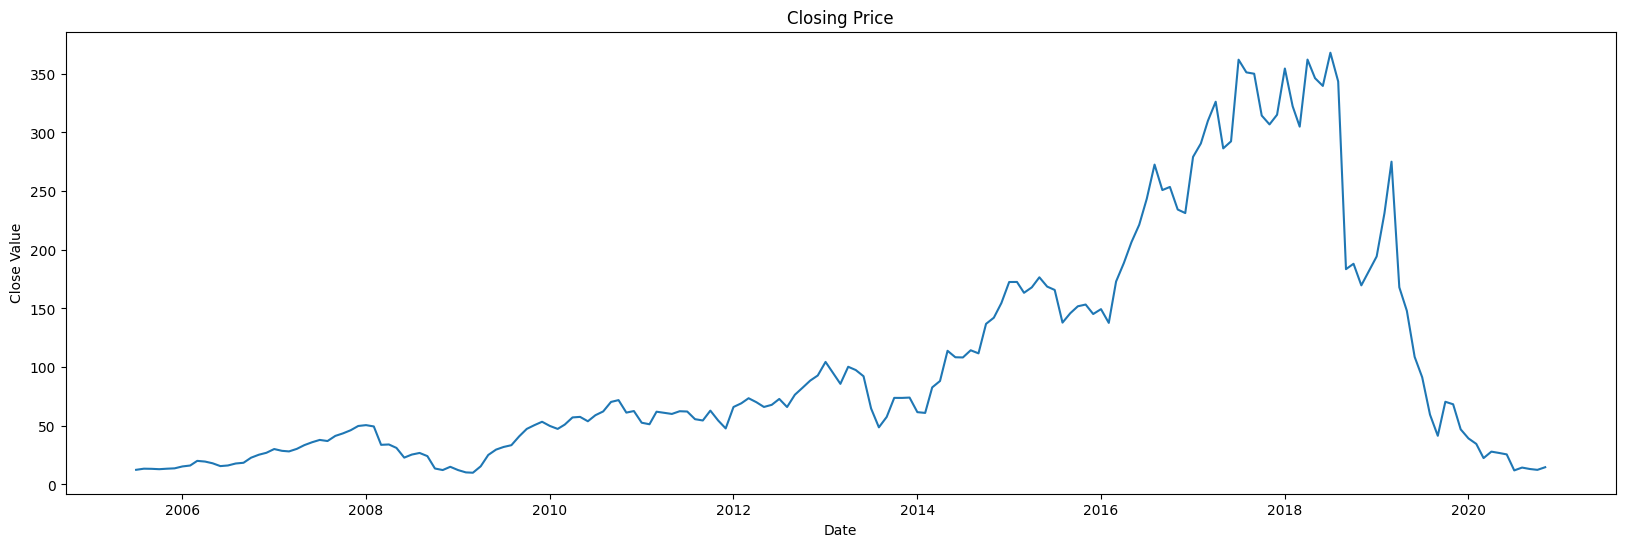

In [ ]:
plt.figure(figsize =(20,6))
plt.plot(df['Close'])
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.show()

In the above graph we can see after 2018 the price hit a bottom drastically is this because of fraud case of Rana Kapoor.

Chart - 2

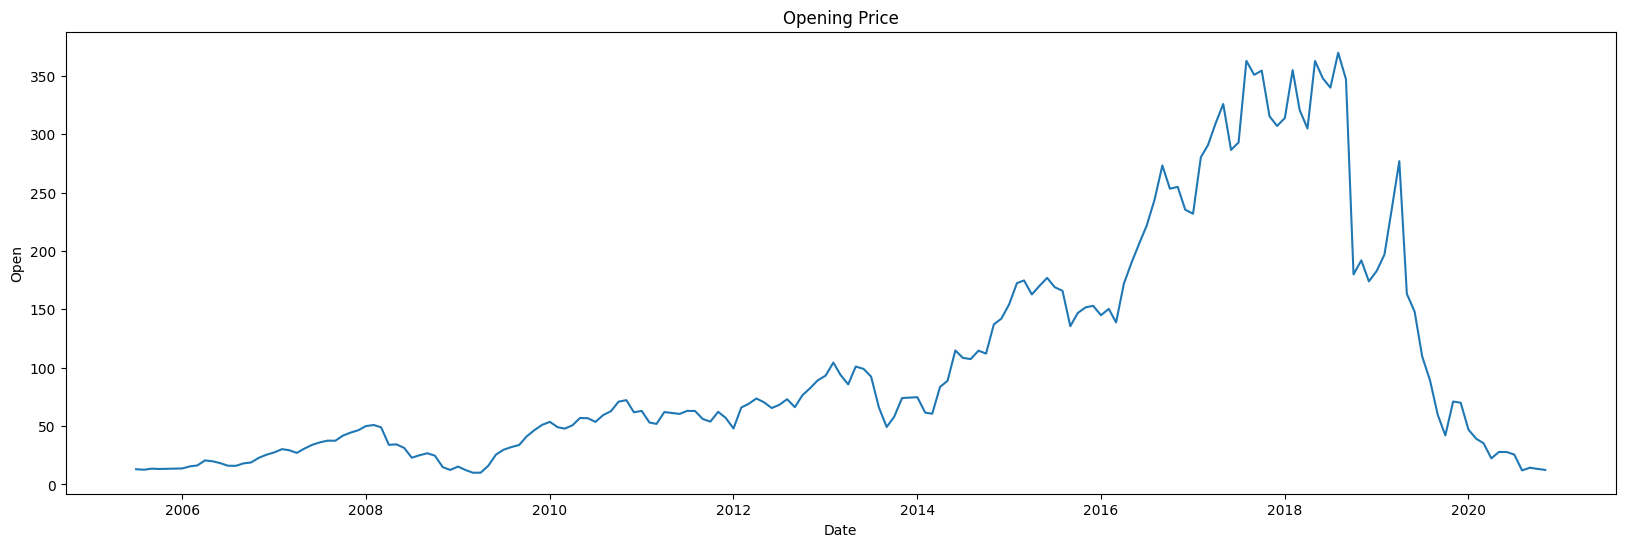

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Opening Price')
plt.show()

The closing graph and openng graph is almost same. after 2014 we can see the drastic grow and was reaching top till 2018 then hit the bottom.

Chart - 3

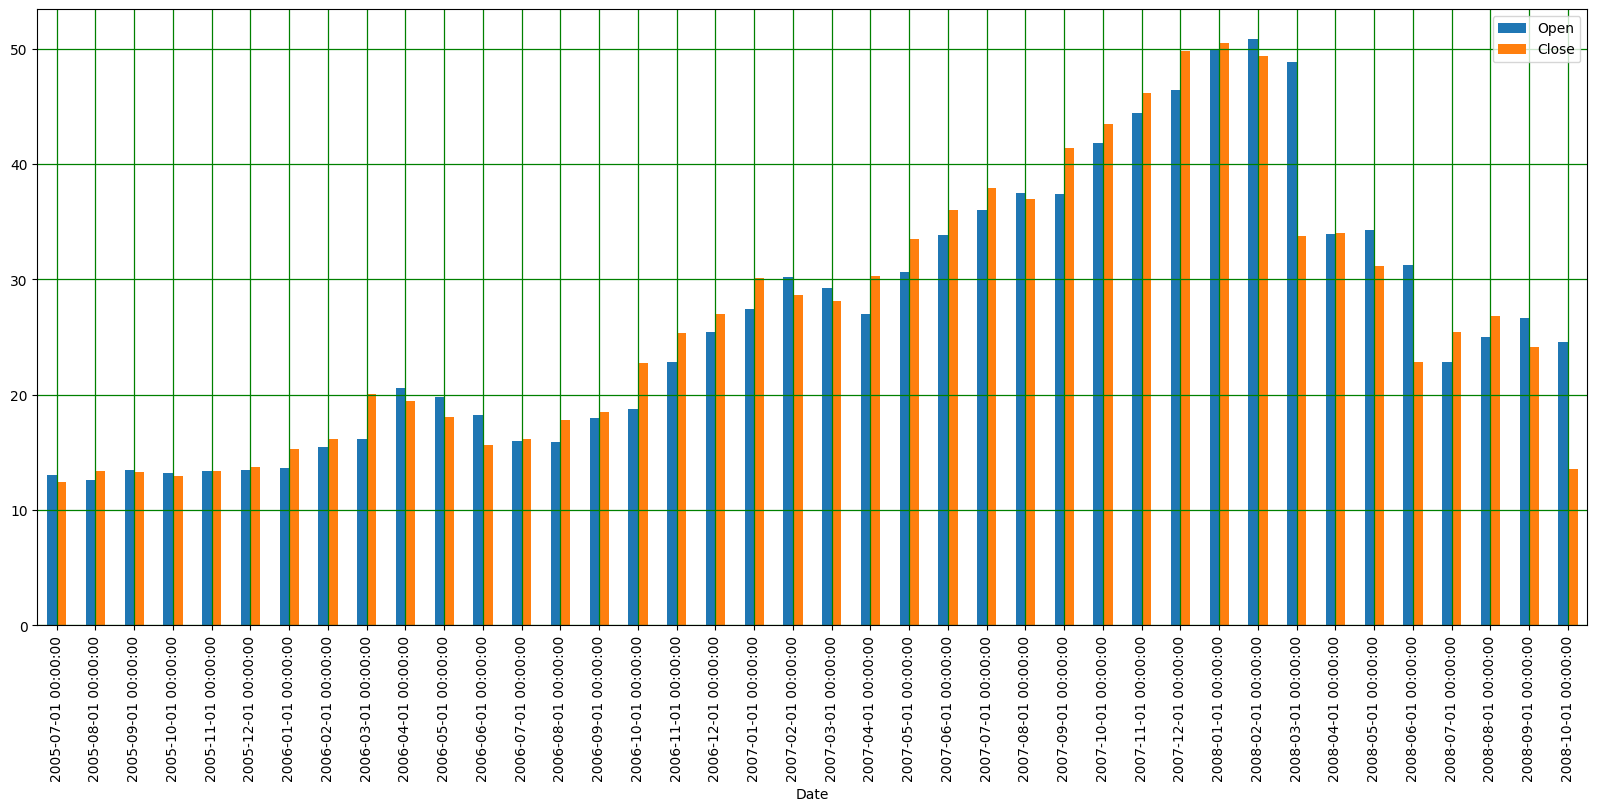

In [ ]:
df[['Open', 'Close']].head(40).plot(kind='bar', figsize=(20,8))

#adding grid line
plt.grid(True,linestyle='-', linewidth= '0.9', color='green')

#showt the plot
plt.show()

From the above graph we can conclude that after 2018 there is fall in stock price of Yes bank, and it didn't raised at all. It is a bad news for investors.

Chart - 4

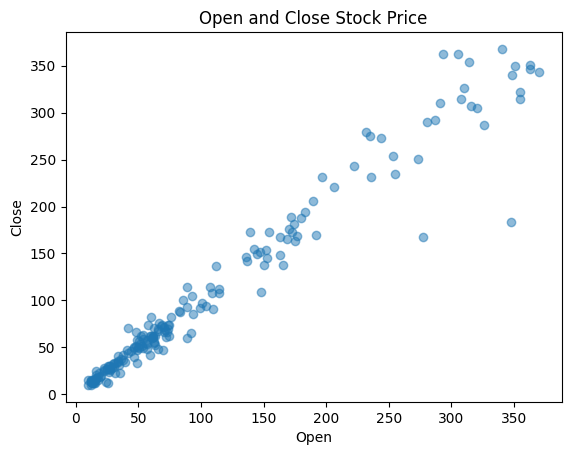

In [ ]:
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Open and Close Stock Price')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

Chart - 5

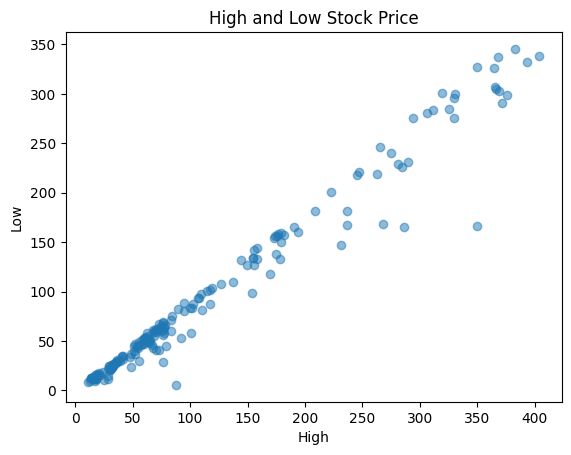

In [ ]:
plt.scatter(df['High'], df['Low'], alpha = 0.5)
plt.title('High and Low Stock Price')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

Chart - 6

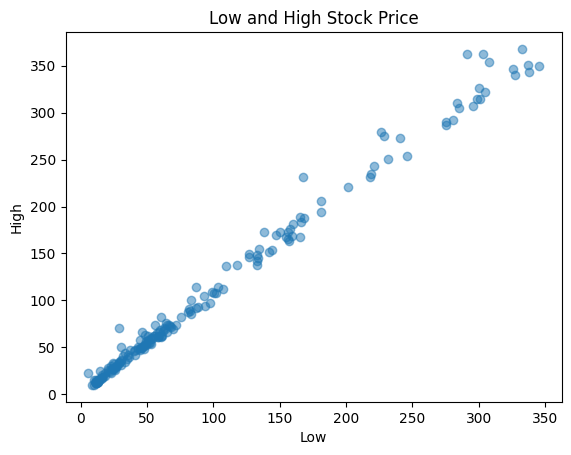

In [ ]:
plt.scatter(df['Low'], df['Close'], alpha=0.5)
plt.xlabel('Low')
plt.ylabel('High')
plt.title('Low and High Stock Price')
plt.show()

Chart - 7

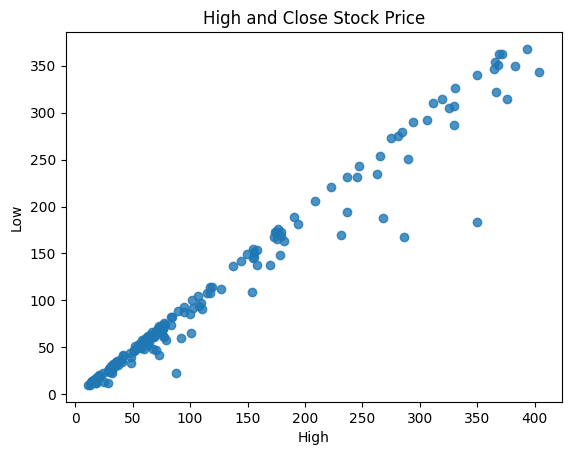

In [ ]:
plt.scatter(df['High'], df['Close'], alpha = 0.8)
plt.title('High and Close Stock Price')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

From the above scatter plots, there we can see that there is correlation between each other variables.

Chart - 8

<ipython-input-14-5674af6854ca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'],color='green')


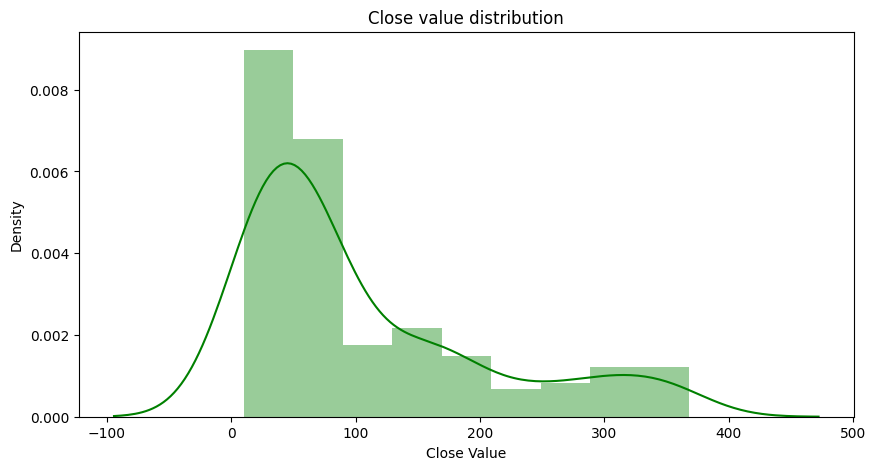

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df['Close'],color='green')
plt.title("Close value distribution")
plt.xlabel("Close Value")
plt.show()

We can see the density of the close value distribution.

Chart - 9

<ipython-input-23-047b60060707>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'], color='brown')


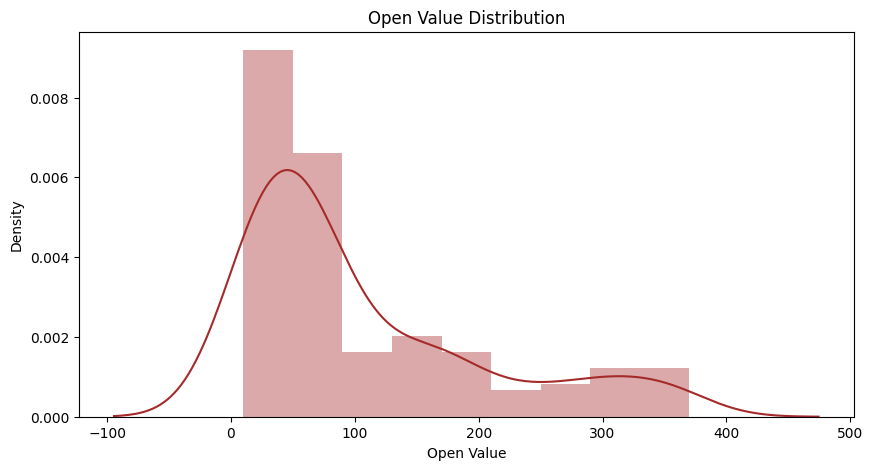

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Open'], color='brown')
plt.title('Open Value Distribution')
plt.xlabel('Open Value')
plt.show()

We can see the density of open value distribution.

Chart - 10

<ipython-input-18-9cb6df8356f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'], color='blue')


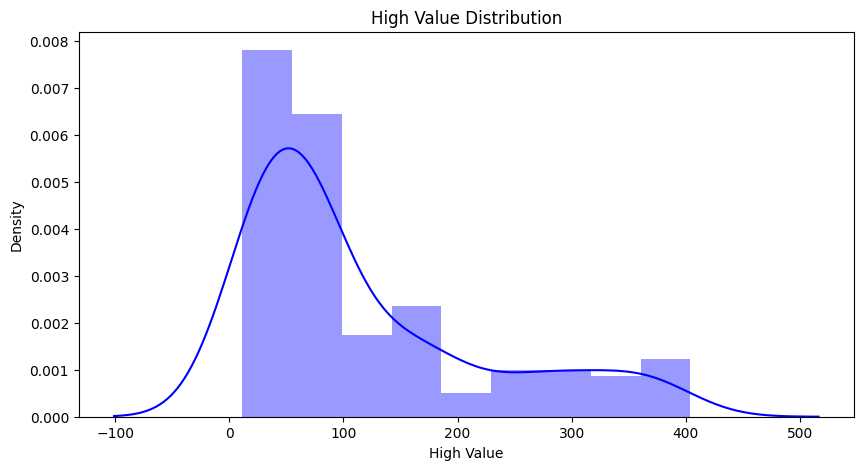

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['High'], color='blue')
plt.title('High Value Distribution')
plt.xlabel('High Value')
plt.show()

We can see the density of the high value distribution.

Chart - 11

<ipython-input-20-a54a4550043e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Low'],color='black')


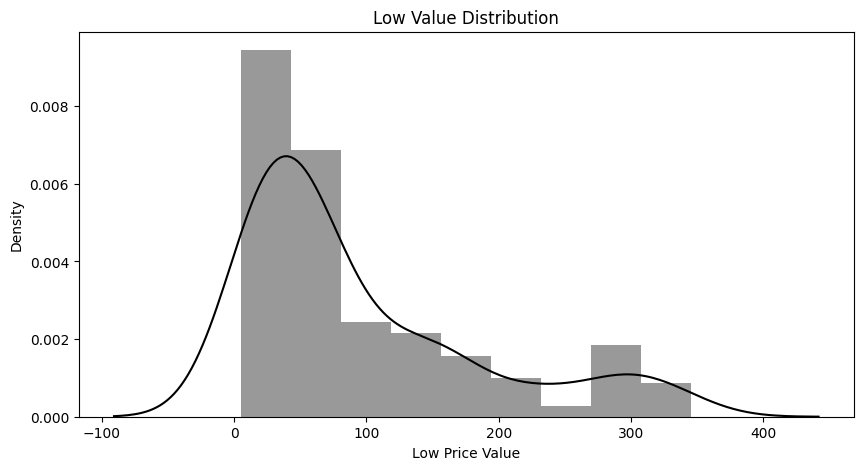

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Low'],color='black')
plt.xlabel('Low Price Value')
plt.title('Low Value Distribution')
plt.show()

We can see the density of Low value distribution from the above plot.

Chart - 12 - Correlation Heatmap

<Axes: >

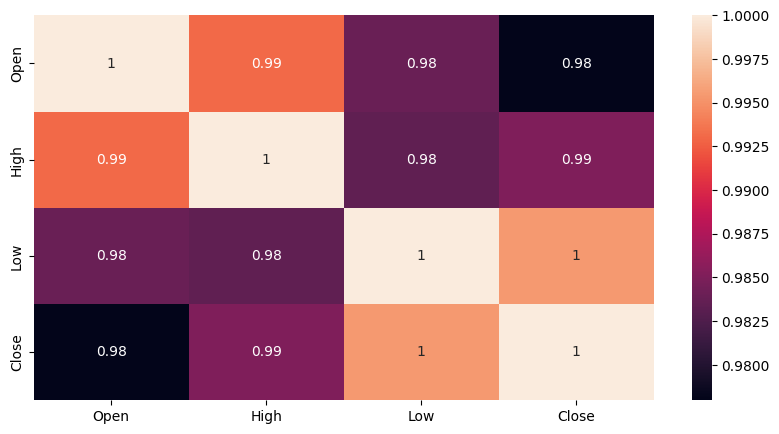

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

From the above plots we can see that there is a corelation between each variables.

There are several ways to handle the multi corelation in regression, Principal component analysis and ridge regression are popular used.

We are going to use Lasso and Ridge Regression.

## Feature Engineering and Data Pre - processing

We are going to use linear regression machine learning algorithm to build our model. It is a statical method that is used for predictive analysis. Linear Regression shows a relation between dependent variable and independent variable.

In [ ]:
#creting set of numerical features
numeric_columns = list(df.select_dtypes(['int64','float64']).columns)
numeric_fetures = pd.Index(numeric_columns)
numeric_fetures

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

Here we converted the numerical data type int64 and float64 to object data type so that we can categorise these columns into independent and dependent variables.

In [ ]:
dependent_variable = 'Close'

In [ ]:
independent_variable = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variable

['Open', 'Low', 'High']

In [ ]:
#creating data of independent variables
X = df[independent_variable].values

#creating data of dependent variables
y=df[independent_variable].values

In [ ]:
df[independent_variable]

,High,Low,Open
Date,,,
2005-07-01,14.00,11.25,13.00
2005-08-01,14.88,12.55,12.58
2005-09-01,14.87,12.27,13.48
2005-10-01,14.47,12.40,13.20
2005-11-01,13.88,12.88,13.35
...,...,...,...
2020-07-01,28.30,11.10,25.60
2020-08-01,17.16,11.85,12.00
2020-09-01,15.34,12.75,14.30


In [ ]:
#aplitting the dataset into training setand test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state = 1)


In [ ]:
X_train[:,0]

array([ 56.7 ,  62.9 , 169.  , 363.  , 170.  ,  25.4 ,  13.49, 189.8 ,
       135.61, 104.41,  56.94, 100.99, 150.4 , 347.2 , 180.  , 153.  ,
        68.15, 154.4 ,  24.6 ,  44.4 ,  10.  ,  93.2 ,  33.9 ,  41.2 ,
        27.4 ,  62.  ,  39.1 , 305.  ,  58.  ,  16.  , 151.73, 174.  ,
       147.95, 114.8 ,  71.  , 142.08,  15.9 , 177.  , 277.  ,  10.04,
       197.  ,  22.85, 315.5 ,  70.  , 355.  ,  89.2 , 114.6 ,  14.3 ,
        99.  , 192.  ,  53.8 ,  27.  ,  13.3 ,  13.48,  61.26,  73.  ,
       231.98,  13.68,  49.2 ,  13.  , 286.66,  57.  ,  61.8 ,  49.  ,
       137.1 ,  82.54, 253.41,  15.94,  62.8 ,  56.  ,  94.  , 354.6 ,
        42.  ,  76.4 ,  25.6 , 146.96,  19.8 ,  34.3 ,  48.9 , 320.7 ,
        26.68,  65.45,  27.8 ,  12.41,  41.8 ,  74.  ,  33.89,  61.54,
        53.  ,  20.56, 109.6 ,  60.52,  59.5 , 112.1 ,  46.9 ,  72.2 ,
        18.78,  12.4 , 314.  , 107.4 ,  69.  ,  46.58,  37.4 ,  62.2 ,
        12.19,  35.98,  13.2 ,  89.2 ,  31.98, 206.4 ,  35.2 ,  49.99,
      

In [ ]:
# letssee the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148, 3)
(37, 3)


## ML - Model Implementation

ML MODEL - 1

In [ ]:
#Applying the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#prediction
y_pred = lr_model.predict(X_test)

In [ ]:
print('Coefficients:', lr_model.coef_)

Coefficients: [[ 1.00000000e+00 -1.52324665e-17  3.90683576e-16]
 [ 6.23081883e-16  1.00000000e+00 -2.22044605e-16]
 [ 4.70421036e-16 -2.22044605e-16  1.00000000e+00]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.9582623893289695e-27
R-squared: 1.0


In [ ]:
coefficients = lr_model.coef_
intercept = lr_model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: [[ 1.00000000e+00 -1.52324665e-17  3.90683576e-16]
 [ 6.23081883e-16  1.00000000e+00 -2.22044605e-16]
 [ 4.70421036e-16 -2.22044605e-16  1.00000000e+00]]
Intercept: [-4.26325641e-14 -8.52651283e-14 -5.68434189e-14]


In [ ]:
lr_model.score(X_test,y_test)

1.0

we got 100% accuracy in the model score.

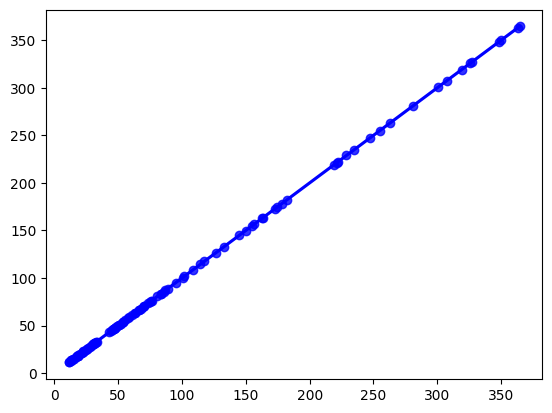

In [ ]:
# Assuming y_test and y_pred are 2D arrays or DataFrames
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()
y_pred_flat = y_pred.values.ravel() if hasattr(y_pred, 'values') else y_pred.ravel()

sns.regplot(x=y_test_flat, y=y_pred_flat, ci=None, color='blue')
plt.show()


We can see the predicted line in the graph.

## Residual Plot

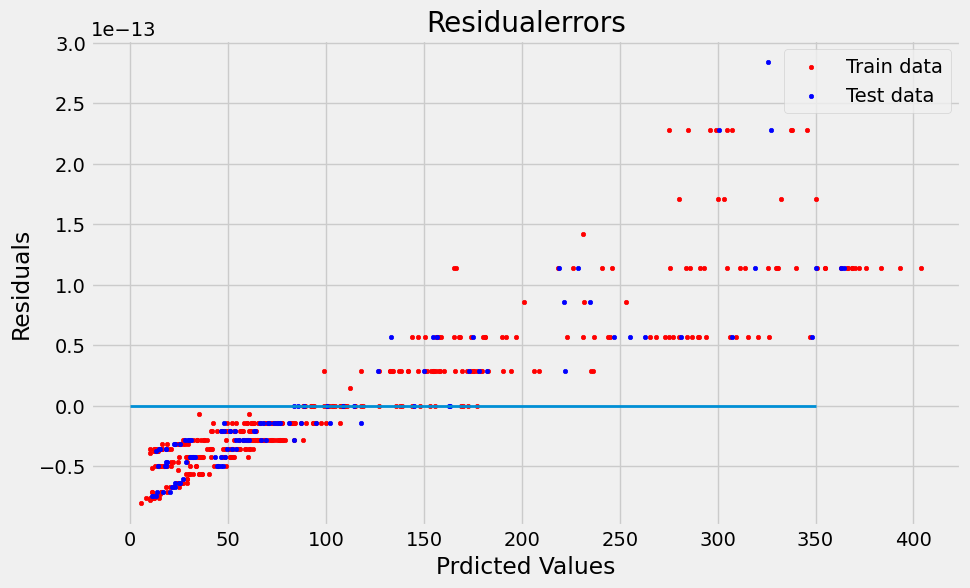

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))

# plotting residual errors in training data
plt.scatter(lr_model.predict(X_train), lr_model.predict(X_train) - y_train, color='red', s=10, label='Train data')

# plotting residual errors in test data
plt.scatter(lr_model.predict(X_test), lr_model.predict(X_test) - y_test, color='blue', s=10, label='Test data')

# Plotting ine for zero residual error
plt.hlines(y=0, xmin=0, xmax=350, linewidth=2)


plt.legend(loc='upper right')
plt.title('Residualerrors')
plt.xlabel('Prdicted Values')
plt.ylabel('Residuals')
plt.show()

A residual is a measure of how far away a point is vertically from the regression line. It is the error between a predicted value and the observed actual value.

In this residual plot it has a high density of points close to the origin and a low density of points away from the original and also it is symmetric about the origin.

This linear model is a good fit for relatively small x-value, but is not a good predictor of large x-values

Now, applying lasso regression, we can prevent our dataset from overfit.

ML MODEL - 2

In [ ]:
# Applying Lasso Regression Model
lasso = Lasso(alpha=0.010, max_iter = 3000)

In [ ]:
# Fitting Lasso Model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
# Performance
print("MSE :", mean_squared_error(y_test, y_pred_l))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :", mean_absolute_error(y_test, y_pred_l))
print('R2 : ', metrics.r2_score(y_test,y_pred_l))

MSE : 0.0021354142009074252
RMSE : 0.04621054209709539
MAE : 0.023558927636007365
R2 :  0.9999997594404991


R^2 value is 99.99% which indicates high accuracy of our model.

##Cross Validation

In cross validation we can perform our model with test dataset through thatwe can check our model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8,1e-5,1e-4,1e-3,1e-2,1e-1, 0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be:", lasso_regressor.best_params_)
print("\nUsing", lasso_regressor.best_params_, " the negative meaan squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be: {'alpha': 1}

Using {'alpha': 1}  the negative meaan squared error is:  -0.002645074482381708


In [ ]:
# Prediction
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Test Performance
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print("MAE :", mean_absolute_error(y_test, y_pred_lasso))
print("R2 :", metrics.r2_score(y_test, y_pred_lasso))

MSE: 0.0007138674610560353
RMSE: 0.026718298244013134
MAE : 0.01513644008324599
R2 : 0.9999999265475736


R squared value for the test data is 99.9% this is same as score from training dataset which proves that in a dataset we achieve the best fit model.

## Performance Visualisation

In [ ]:
# prediction
y_pred_1 = lr_model.predict(X_test)

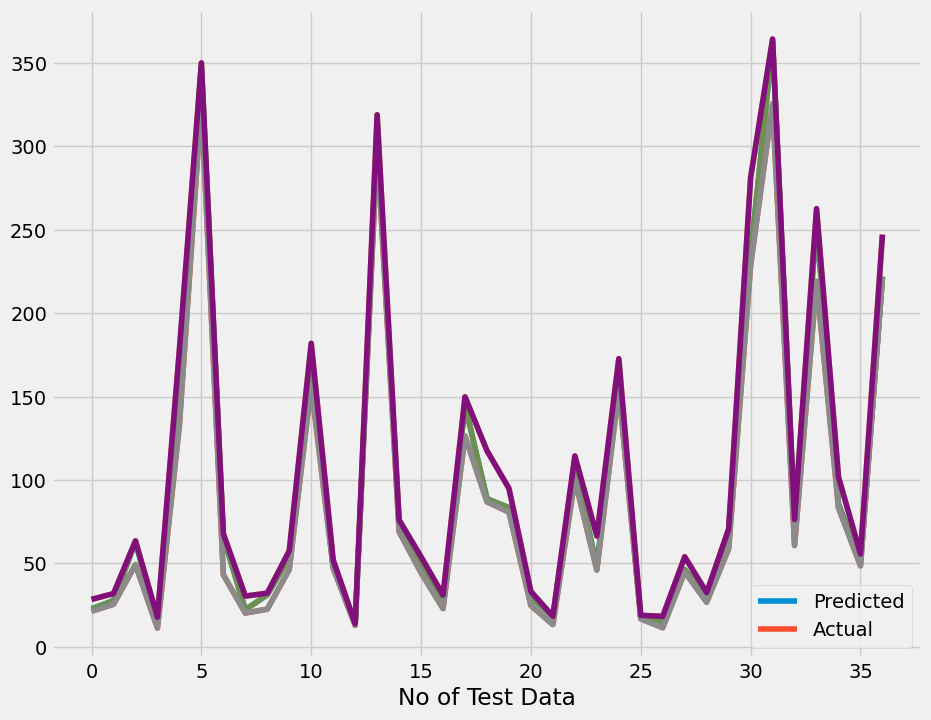

In [ ]:
#Linear regression model performance visualization
plt.figure(figsize=(10,8))
plt.plot(y_pred_1)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.xlabel('No of Test Data')
plt.show()

From the figure we can say that we predict the best fit model for our dataset.

Conclusion:

we did the data wrangling and data cleaning, the we proceed to do the EDA part.

In EDA we concluded that:
Stock close price is decreased after 2018 it is mainly because of Rana Kapoor case and hitted the stock price badly. The graph for Yes bank opening and closing price has same result. The point that the stock price of the YES BANK falls down after the year 2018 and it is not beneficial for investors to invest their money. From scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features. All histogram plot shows that all are right skewed. From heatmap we canconclude that all the feature showing high correlation between each other. We implementedlinear regression and the accuracy of our linear regression model is 99.9%.

In end we visualise the performance of our linear regression model and the graph shows that we achieve the best fit model for our dataset.